# K-Nearest-Neighbors

👇 `data` klasöründe bulunan `houses_clean.csv` dataset'ini yükleyin  
Veya doğrudan bu URL'den yükleyebilirsiniz: [https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv).  

Dataset açıklaması dataset-description.md dosyasında bulunabilir.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv"
df = pd.read_csv(url)
df.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


💡 Çoğu özellik zaten önceden işlenmiştir (normalizasyonla ölçeklendirilmiştir), tıpkı Veri Hazırlama gününde yaptığınız gibi  

💡 Bir özellik olan `GrLiveArea` normalleştirilmemiştir. Daha sonra normalizasyonunun model performansımız üzerindeki etkisini görmek için bu şekilde tutuyoruz  

👇 Bunu tanımlayıcı istatistiklerle kolayca görebilirsiniz, min ve max değerlerine bakın

In [63]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Varsayılan KNN

🎯 Görev, tüm özelliklerle evlerin fiyatını (`SalePrice`) tahmin etmektir.

👇 Böyle bir görevde varsayılan [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)'ı değerlendirmek için çapraz doğrulama kullanın.  
❓ `SalePrice`'taki varyansın özellikler tarafından açıklanan oranı nedir?  
Cevabınızı `base_knn_score` adlı bir değişkende saklayın.

<details>
<summary> 💡 İpucu </summary>
    <br>
    ℹ️ Bağımlı değişkendeki varyansın bağımsız değişkenler tarafından açıklanan oranı R2 skoru'dur.
</details>

In [64]:
X = df.drop("SalePrice", axis=1)
y =df["SalePrice"]

knn = KNeighborsRegressor()

scores_sales = cross_val_score(
    knn,
    X,
    y,
    cv=5,
    scoring="r2"
)

base_knn_score = scores_sales.mean()
print("Cross valued KNN score is : ",base_knn_score)



Cross valued KNN score is :  0.608370347216843


### 🧪 Kodunuzu kontrol edin

In [65]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.49s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Ölçek duyarlılığı

KNN'ler ve mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlı olabilir. 

👇 Özellik kümesini **tam ortak aralık** içinde yeniden ölçeklendirin ve `X_rescaled` adlı bir değişken altında kaydedin  
Ardından, yeniden ölçeklendirilmiş özellikler üzerinde bir modeli değerlendirin ve skorunu `rescaled_score` değişken adı altında kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
`MinMaxScaler()`

Sadece `GrLiveArea`'nın normalleştirilmesi gerekmesine rağmen, tüm özelliklerinizde MinMaxScaler kullanmak sorun değil  
    
Gerçekten de, Min-Max Ölçeklendirme [idempotent](https://en.wikipedia.org/wiki/Idempotence) bir dönüşümdür: eğer $X_{max}=1$ ve $X_{min}=0$ ise, o zaman $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>

In [66]:
scaler = MinMaxScaler()

#df["GrLiveArea"]
X_rescaled = scaler.fit_transform(X)
scores_rescaled = cross_val_score(
    knn,
    X_rescaled,
    y,
    cv=5,
    scoring="r2"
)

rescaled_score = scores_rescaled.mean()
base_knn_score, rescaled_score


(0.608370347216843, 0.649893812648999)

👉 R2 skoru artmış olmalı!

💡 Mesafe tabanlı algoritmaları modellerken özelliklerin tam ortak aralıkta olması tercih edilir.  
Ancak, her zaman daha iyi bir skor garanti etmez.  
Bu bir deneme yanılma sürecidir.

### 🧪 Kodunuzu kontrol edin

In [67]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# $k$ Optimizasyonu

👇 Yeniden ölçeklendirilmiş özellikler üzerinde bir KNNRegressor'ın K parametresini (`n_neighbors` parametresini kullanarak) ince ayarlayın. K 1'den 25'e kadar arttıkça skorun evrimini çizin.

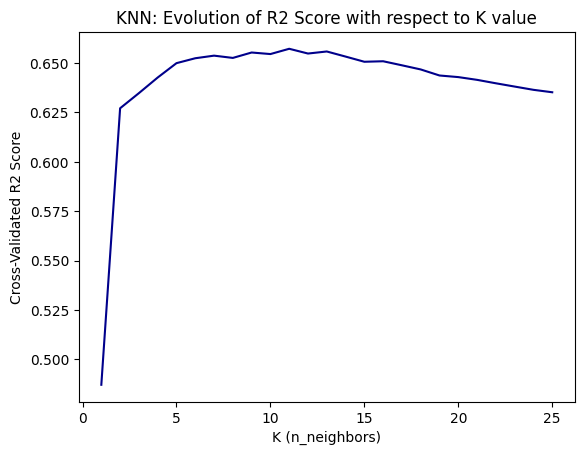

In [68]:
k_values = range(1,26)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_rescaled, y, cv=5, scoring="r2")
    
    cv_scores.append(scores.mean())  

#print(cv_scores)


plt.figure()
plt.plot(k_values, cv_scores, color = "darkblue")
plt.xlabel("K (n_neighbors)")
plt.ylabel("Cross-Validated R2 Score")
plt.title("KNN: Evolution of R2 Score with respect to K value")
plt.show()

❓ K'nın hangi değeri en iyi performansı üretir? Cevabınızı `best_k` değişken adı altında kaydedin.

In [69]:
best_score = max(cv_scores)
best_k = k_values[cv_scores.index(best_score)]
best_k

11

<details>
<summary> 👉 Çözüm 👈</summary>
    
Grafiğinize bakarak, skorun k = 5 civarında artmayı durdurduğunu ve maksimum skorun k = 11 için ulaşıldığını görmelisiniz.

</details>

❓ $k$ < 5 değerleri için modelin kötü performansını nasıl yorumluyorsunuz?

<details>
<summary> 👉 Çözüm 👈</summary>
    
K çok küçük olduğunda, model eğitim kümesine aşırı uyum gösterme eğiliminde olacaktır. İyi genelleştirebilmek için çok az noktaya odaklanacaktır. K'yı artırmak modele tahminlerini dayandıracağı daha fazla örnek verecektir.

</details>

### 🧪 Kodunuzu kontrol edin

In [70]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# KNN'de Aşırı Uyum

💡 KNN'lerin K parametresi çok küçük olduğunda, eğitim kümesine aşırı uyum gösterme ve iyi genelleştirememe riski vardır. 

👇 K=2 parametreli bir KNN'in öğrenme eğrilerini çizin.

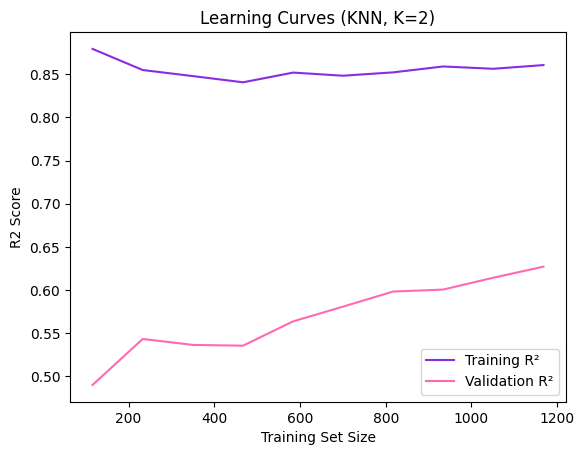

In [71]:
knn_k2 = KNeighborsRegressor(n_neighbors=2)

train_sizes, train_scores, val_scores = learning_curve(
    knn_k2,
    X_rescaled,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()

plt.plot(train_sizes, train_mean, label="Training R²",color = "blueviolet")
plt.plot(train_sizes, val_mean, label="Validation R²", color = "hotpink")

plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.title("Learning Curves (KNN, K=2)")
plt.legend()
plt.show()


👉 Yüksek eğitim skoru ama düşük test skoru gözlemlemelisiniz. ⚠️ Aşırı uyum uyarısı ⚠️ Bu çok düşük K parametresinden kaynaklanır.

# İdeal K

👇 Bu sefer, "$k$ Optimizasyonu" bölümünde bulduğunuz ideal K değeri için öğrenme eğrilerini çizin.

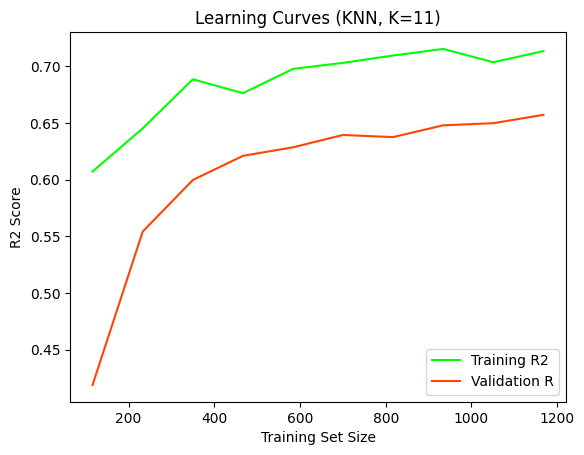

In [72]:
knn_best = KNeighborsRegressor(n_neighbors=best_k)

train_sizes, train_scores, val_scores = learning_curve(
    knn_best,
    X_rescaled,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()

plt.plot(train_sizes, train_mean, label="Training R2",color = "lime")
plt.plot(train_sizes, val_mean, label="Validation R", color = "orangered")

plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.title(f"Learning Curves (KNN, K={best_k})")
plt.legend()
plt.show()



👉 Eğriler yakınsamaya yakın olmalı, bu da modelin daha az aşırı uyum gösterdiğini ve daha iyi genelleştirdiğini gösterir.

💡 KNN modelleriyle modelleme yaparken hatırlanması gereken iki temel unsur vardır:  
    1. Mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlıdır  
    2. K ayarlanmalıdır: performans, genelleştirme ve aşırı uyum arasındaki dengeyi kontrol eder

❓ Optimize edilmiş KNN modelinin gerçek fiyat ile tahmin edilen fiyat arasındaki ortalama fark nedir? Cevabınızı hesaplayın ve `price_error` değişken adı altında kaydedin

<details>
<summary> 💡 İpucu </summary>
    
Hesaplamanız gereken metrik **Negatif Ortalama Mutlak Hata (MAE)**'dır.

</details>

In [73]:
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_rescaled, y)

y_pred = knn_best.predict(X_rescaled)


price_error =  mean_absolute_error(y, y_pred)
price_error

27799.708281444586

### 🧪 Kodunuzu kontrol edin

In [74]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Seçimi

❓ Ev fiyatlarını tahmin etme görevini gerçekleştirmek için bu iki modelden hangisini seçersiniz:
- Az önce ayarladığınız KNN modeli
- Bir Linear Regression modeli

Cevabınızı "KNN" veya "LinearReg" olarak `best_model` değişken adı altında string olarak kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
Hangisini seçeceğinize karar vermek için, aynı görev üzerinde bir Linear Regression skorunu değerlendirmeniz ve KNN'in skoruyla karşılaştırmanız gerekecek. Aynı metrikleri karşılaştırdığınızdan emin olun!!

</details>

In [79]:
lin_reg = LinearRegression()

linreg_scores = cross_val_score(
    lin_reg,
    X_rescaled,
    y,
    cv=5,
    scoring="r2"
)

linreg_score = linreg_scores.mean()
print(linreg_score)

knn_best = KNeighborsRegressor(n_neighbors=best_k)

knn_scores = cross_val_score(
    knn_best,
    X_rescaled,
    y,
    cv=5,
    scoring="r2"
)

knn_score = knn_scores.mean()
print(knn_score)

 
linreg_score,knn_score




0.5944790982110585
0.6571704043326225


(0.5944790982110585, 0.6571704043326225)

💡 Her iki modelin metriklerini karşılaştırdığınızda, KNN modeli Linear Regression'ı geçmelidir. Bu, verideki doğrusal olmayan kalıpları yakalama yeteneğinden kaynaklanabilir.

### 🧪 Kodunuzu kontrol edin

In [80]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁